In [95]:
from urllib.request import urlopen
import networkx as nx
import matplotlib.pyplot as plt

url = "https://nats-www.informatik.uni-hamburg.de/pub/GWV1920/%dcbungsaufgaben/blatt3_environment.txt"
array = []
arrayy = []
matrix = []
data = urlopen(url)

for line in data: 
    s = line.strip()
    array.append(s)

#matrix aufbauen aus dem vorhandenen array    
for elem in array:
    for char in elem:
        i = chr(char)
        arrayy.append(i) 
    matrix.append(arrayy)
    arrayy = []

In [96]:
def neighbours(position):
    a, b = position
    speicher = []
    if (a+1, b) in validpos:
        i = a+1, b
        speicher.append(i)
    if (a-1, b) in validpos:
        i = a-1, b
        speicher.append(i)
    if (a, b+1) in validpos:
        i = a, b+1
        speicher.append(i)
    if (a, b-1) in validpos:
        i = a, b-1
        speicher.append(i)
    return speicher

In [97]:
for key in dictionary2:
    print(dictionary2[key])

{(1, 2), (2, 1)}
{(3, 1), (1, 1), (2, 2)}
{(3, 2), (4, 1), (2, 1)}
{(4, 2), (5, 1), (3, 1)}
{(6, 1), (4, 1), (5, 2)}
{(5, 1), (6, 2), (7, 1)}
{(8, 1), (6, 1), (7, 2)}
{(9, 1), (7, 1)}
{(8, 1), (10, 1)}
{(11, 1), (9, 1)}
{(11, 2), (12, 1), (10, 1)}
{(13, 1), (11, 1), (12, 2)}
{(14, 1), (12, 1), (13, 2)}
{(13, 1), (14, 2), (15, 1)}
{(16, 1), (14, 1), (15, 2)}
{(17, 1), (16, 2), (15, 1)}
{(16, 1), (17, 2), (18, 1)}
{(17, 1), (18, 2)}
{(1, 3), (1, 1), (2, 2)}
{(1, 2), (3, 2), (2, 3), (2, 1)}
{(4, 2), (3, 1), (3, 3), (2, 2)}
{(3, 2), (5, 2), (4, 1), (4, 3)}
{(4, 2), (5, 1), (6, 2), (5, 3)}
{(6, 3), (6, 1), (5, 2), (7, 2)}
{(7, 3), (6, 2), (7, 1)}
{(12, 2), (11, 1)}
{(11, 2), (13, 2), (12, 1)}
{(12, 2), (14, 2), (13, 1)}
{(14, 1), (13, 2), (15, 2)}
{(15, 3), (14, 2), (16, 2), (15, 1)}
{(17, 2), (16, 3), (16, 1), (15, 2)}
{(17, 1), (17, 3), (16, 2), (18, 2)}
{(17, 2), (18, 3), (18, 1)}
{(1, 2), (2, 3), (1, 4)}
{(2, 2), (1, 3), (3, 3), (2, 4)}
{(3, 4), (3, 2), (2, 3), (4, 3)}
{(4, 2), (4, 4), 

In [98]:
#rekursiv nach startpunkt s suchen
#helper array leider zwingend notwendig, da der returnType sonst NullType wäre
s = []
def find_s(x,y):
    border = len(matrix) -1
    if matrix[x][y] == "s":
        s.append(x)
        s.append(y)
    else:
        #print(x,y)
        if x == border:
            y = y + 1
            x = 0
        x = x+1
        find_s(x,y)
find_s(0,0)
print(s)
start = tuple(s)
print(start)

[4, 4]
(4, 4)


In [99]:
#rekursiv nach startpunkt s suchen
#helper array leider zwingend notwendig, da der returnType sonst NullType wäre
g = []
def find_g(x,y):
    border = len(matrix) -1
    if matrix[x][y] == "g":
        g.append(x)
        g.append(y)
    else:
        #print(x,y)
        if x == border:
            y = y + 1
            x = 0
        x = x+1
        find_g(x,y)
find_g(0,0)
print(g)
goal = tuple(g)
print(goal)

[7, 14]
(7, 14)


In [100]:
a = 0
b = 0 
dictionary = {}
validpos = []
dictionary2 = {}
for i in matrix:
    for j in i:
        if j == ' ':
            dictionary[a,b] = []
            i = a,b
            validpos.append(i)
        if j == 's':
            dictionary[a,b] = []
            i = a,b
            validpos.append(i)
        if j == 'g':
            dictionary[a,b] = []
            i = a,b
            validpos.append(i)
        a = a + 1
    a = 0
    b = b + 1

for key in dictionary.keys():
    a, b = key
    if (a, b) in validpos:
        dictionary2[key] = set(neighbours(key))
        #print(neighbours(key))

In [101]:
Graph = nx.Graph()
for i in validpos:
    Graph.add_node(i)

for key in dictionary2:
    print(key)
    for var in dictionary2[key]:
        print(var)    
        Graph.add_edge(key, var)

(1, 1)
(1, 2)
(2, 1)
(2, 1)
(3, 1)
(1, 1)
(2, 2)
(3, 1)
(3, 2)
(4, 1)
(2, 1)
(4, 1)
(4, 2)
(5, 1)
(3, 1)
(5, 1)
(6, 1)
(4, 1)
(5, 2)
(6, 1)
(5, 1)
(6, 2)
(7, 1)
(7, 1)
(8, 1)
(6, 1)
(7, 2)
(8, 1)
(9, 1)
(7, 1)
(9, 1)
(8, 1)
(10, 1)
(10, 1)
(11, 1)
(9, 1)
(11, 1)
(11, 2)
(12, 1)
(10, 1)
(12, 1)
(13, 1)
(11, 1)
(12, 2)
(13, 1)
(14, 1)
(12, 1)
(13, 2)
(14, 1)
(13, 1)
(14, 2)
(15, 1)
(15, 1)
(16, 1)
(14, 1)
(15, 2)
(16, 1)
(17, 1)
(16, 2)
(15, 1)
(17, 1)
(16, 1)
(17, 2)
(18, 1)
(18, 1)
(17, 1)
(18, 2)
(1, 2)
(1, 3)
(1, 1)
(2, 2)
(2, 2)
(1, 2)
(3, 2)
(2, 3)
(2, 1)
(3, 2)
(4, 2)
(3, 1)
(3, 3)
(2, 2)
(4, 2)
(3, 2)
(5, 2)
(4, 1)
(4, 3)
(5, 2)
(4, 2)
(5, 1)
(6, 2)
(5, 3)
(6, 2)
(6, 3)
(6, 1)
(5, 2)
(7, 2)
(7, 2)
(7, 3)
(6, 2)
(7, 1)
(11, 2)
(12, 2)
(11, 1)
(12, 2)
(11, 2)
(13, 2)
(12, 1)
(13, 2)
(12, 2)
(14, 2)
(13, 1)
(14, 2)
(14, 1)
(13, 2)
(15, 2)
(15, 2)
(15, 3)
(14, 2)
(16, 2)
(15, 1)
(16, 2)
(17, 2)
(16, 3)
(16, 1)
(15, 2)
(17, 2)
(17, 1)
(17, 3)
(16, 2)
(18, 2)
(18, 2)
(17, 2)
(18, 3)
(1

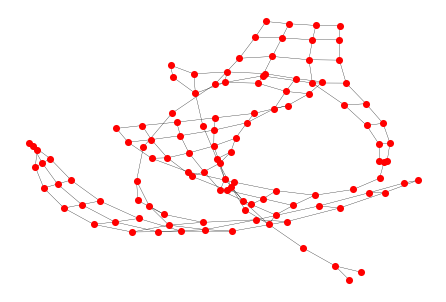

In [102]:
options = {
    'node_color': 'red',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.3,
}
nx.draw(Graph, **options)
#plt.show()


In [103]:
Graph.number_of_nodes()
Graph.nodes
Graph[start]


AtlasView({(4, 3): {}, (3, 4): {}, (4, 5): {}, (5, 4): {}})

In [118]:
def BFS(graph, s):
    queue = []
    visited = []
    # Mark the source node as  
        # visited and enqueue it 
    queue.append(tuple(s)) 
    visited.append(tuple(s))
  
    while queue: 
  
        # Dequeue a vertex from  
        # queue and print it 
        s = queue.pop(0)
        print (s, end = " ")
        if s != tuple(goal):
            for i in Graph[s]:
                if i not in visited:
                    queue.append(tuple(i))
                    #print(queue)
                    visited.append(tuple(Graph[i]))

  

In [119]:
BFS(Graph, start)

(4, 4) (4, 3) (3, 4) (4, 5) (5, 4) (4, 2) (3, 3) (5, 3) (3, 3) (2, 4) (3, 5) (3, 5) (5, 5) (5, 3) (6, 4) (5, 5) (4, 1) (3, 2) (5, 2) (4, 3) (3, 2) (2, 3) (3, 4) (4, 3) (5, 2) (4, 3) (6, 3) (5, 4) (3, 2) (2, 3) (3, 4) (4, 3) (2, 3) (1, 4) (2, 5) (3, 4) (3, 4) (2, 5) (4, 5) (3, 4) (2, 5) (4, 5) (5, 4) (4, 5) (5, 6) (6, 5) (5, 2) (4, 3) (6, 3) (5, 4) (6, 3) (5, 4) (7, 4) (6, 5) (5, 4) (4, 5) (5, 6) (6, 5) (3, 1) (4, 2) (5, 1) (3, 1) (2, 2) (4, 2) (3, 3) (5, 1) (4, 2) (6, 2) (5, 3) (4, 2) (3, 3) (5, 3) (3, 1) (2, 2) (4, 2) (3, 3) (2, 2) (1, 3) (3, 3) (2, 4) (3, 3) (2, 4) (3, 5) (4, 2) (3, 3) (5, 3) (5, 1) (4, 2) (6, 2) (5, 3) (4, 2) (3, 3) (5, 3) (6, 2) (5, 3) (7, 3) (6, 4) (5, 3) (6, 4) (5, 5) (3, 1) (2, 2) (4, 2) (3, 3) (2, 2) (1, 3) (3, 3) (2, 4) (3, 3) (2, 4) (3, 5) (4, 2) (3, 3) (5, 3) (2, 2) (1, 3) (3, 3) (2, 4) (1, 3) (1, 5) (2, 4) (2, 4) (1, 5) (2, 6) (3, 5) (3, 3) (2, 4) (3, 5) (3, 3) (2, 4) (3, 5) (2, 4) (1, 5) (2, 6) (3, 5) (3, 5) (5, 5) (3, 3) (2, 4) (3, 5) (2, 4) (1, 5) (2, 6)

(7, 3) (6, 4) (5, 3) (6, 4) (5, 5) (7, 3) (6, 4) (7, 5) (8, 4) (6, 4) (5, 5) (7, 5) (5, 1) (4, 2) (6, 2) (5, 3) (4, 2) (3, 3) (5, 3) (6, 2) (5, 3) (7, 3) (6, 4) (5, 3) (6, 4) (5, 5) (6, 2) (5, 3) (7, 3) (6, 4) (5, 3) (6, 4) (5, 5) (7, 3) (6, 4) (7, 5) (8, 4) (6, 4) (5, 5) (7, 5) (5, 3) (6, 4) (5, 5) (3, 5) (5, 5) (5, 5) (5, 7) (6, 4) (5, 5) (7, 5) (1, 1) (3, 1) (2, 2) (3, 1) (2, 2) (4, 2) (3, 3) (3, 1) (4, 2) (5, 1) (1, 1) (3, 1) (2, 2) (1, 1) (1, 3) (2, 2) (3, 1) (2, 2) (4, 2) (3, 3) (2, 2) (1, 3) (3, 3) (2, 4) (3, 1) (4, 2) (5, 1) (3, 1) (2, 2) (4, 2) (3, 3) (5, 1) (4, 2) (6, 2) (5, 3) (4, 2) (3, 3) (5, 3) (3, 1) (2, 2) (4, 2) (3, 3) (2, 2) (1, 3) (3, 3) (2, 4) (3, 3) (2, 4) (3, 5) (4, 2) (3, 3) (5, 3) (1, 1) (3, 1) (2, 2) (1, 1) (1, 3) (2, 2) (3, 1) (2, 2) (4, 2) (3, 3) (2, 2) (1, 3) (3, 3) (2, 4) (1, 1) 

KeyboardInterrupt: 